In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pydicom
import statsmodels
from os import listdir

## Pregunta 1



### Imagen 1:

Tamano de imagen:  (200, 200)
Data type de la imagen:  uint16


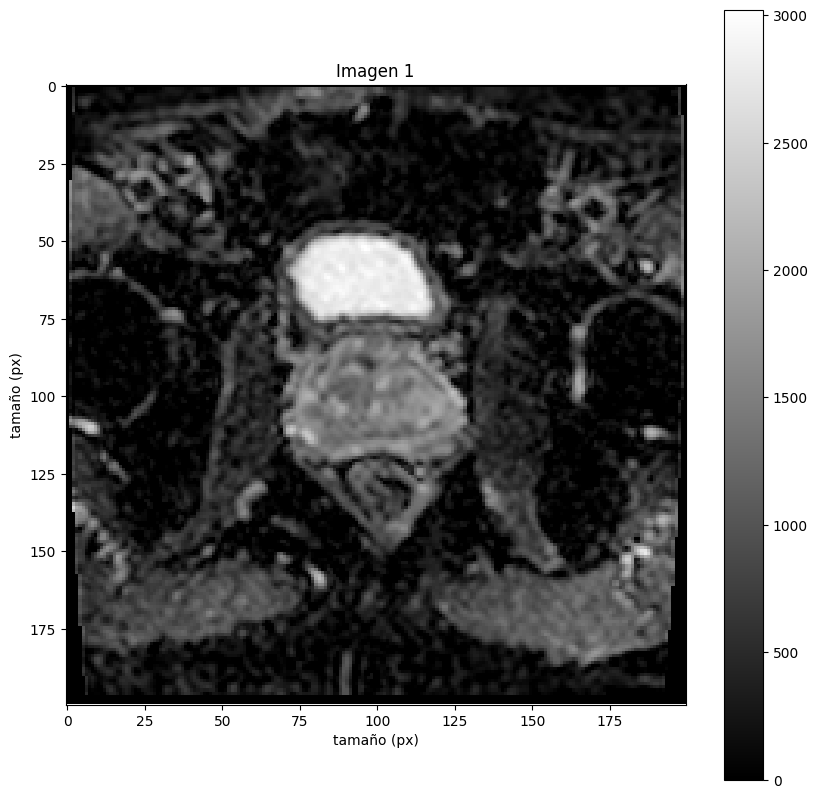

In [13]:
data_img_1 = pydicom.dcmread('96.dcm') 
img_1 = data_img_1.pixel_array

img_1_head = data_img_1 

print('Tamano de imagen: ',img_1.shape)
print('Data type de la imagen: ',img_1.dtype)

plt.figure(figsize=(10,10))
plt.imshow(img_1, cmap=plt.cm.gray)  
plt.xlabel('tamaño (px)')
plt.ylabel('tamaño (px)')
plt.title('Imagen 1')
plt.colorbar() 
plt.show()

### Modalidad de adquisición
Para obtener esta información se debe acceder al método: *.Modality*

In [14]:
print('La modalidad de adquisición corresponde a: ', img_1_head.Modality)

La modalidad de adquisición corresponde a:  MR


Escalado de imagen cruda a unidad de Houndsfield 

$Img_{res} = m \cdot Img + b$
- donde: 
    - $Img_{res}$: Imagen reescalda en unidad de Houndsfield.
    - $m$: Corresponde a la pendiente de reescalado obtenida de *img_1_head.RescaleSlope*.
    - $b$: Corresponde al intercepto de reescalado obtenida de *img_1_head.RescaleIntercept*.
    - $Img$: Corresponde a la imagen en crudo obtenida desde el archivo **DICOM**.


Representación de píxeles: 0
Valor mínimo de la imagen reescalada: 0.0
Valor máximo de la imagen reescalada: 3023.0


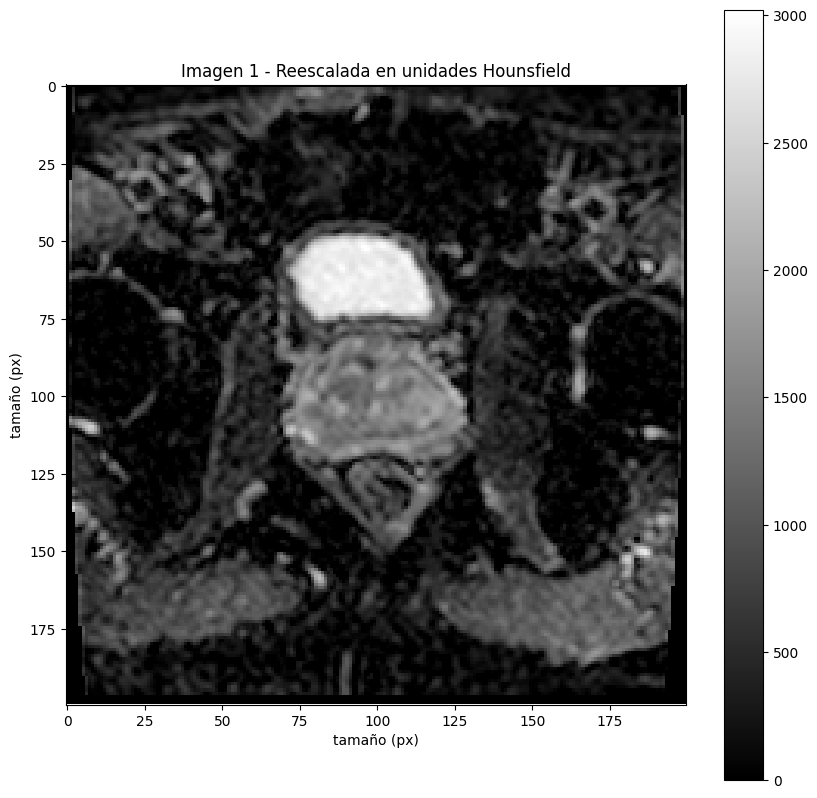

In [15]:
m = img_1_head.RescaleSlope
b = img_1_head.RescaleIntercept
img_1_res = m * img_1 + b

# Corregir el atributo para representación de píxeles
print('Representación de píxeles:', img_1_head.PixelRepresentation)
print('Valor mínimo de la imagen reescalada:', np.min(img_1_res))
print('Valor máximo de la imagen reescalada:', np.max(img_1_res))

plt.figure(figsize=(10,10))
plt.imshow(img_1_res, cmap=plt.cm.gray)  
plt.xlabel('tamaño (px)')
plt.ylabel('tamaño (px)')
plt.title('Imagen 1 - Reescalada en unidades Hounsfield')
plt.colorbar() 
plt.show()

## Pregunta 2

*Supuesto de normalidad:*

$N(0, \sigma^2)$


1. Seleccionar una ROI en el sector que corresponde al ruido, **evitando capturar artefactos**. 

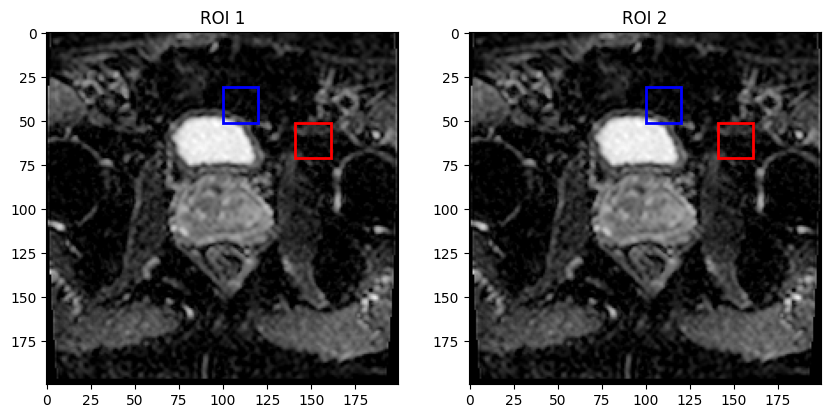

In [20]:
x1, x2 = 141 , 161
y1, y2 = 51 , 71

x11, x21 = 100 , 120
y11, y21 = 31 , 51

ancho1 = x2 - x1
alto1 = y2 - y1

ancho2 = x21 - x11
alto2 = y21 - y11

m1 = rect = patches.Rectangle((x1, y1), ancho1, alto1, linewidth=2, edgecolor='r', facecolor='none')
m2 = rect = patches.Rectangle((x11, y11), ancho2, alto2, linewidth=2, edgecolor='b', facecolor='none')

m3 = rect = patches.Rectangle((x1, y1), ancho1, alto1, linewidth=2, edgecolor='r', facecolor='none')
m4 = rect = patches.Rectangle((x11, y11), ancho2, alto2, linewidth=2, edgecolor='b', facecolor='none')

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].set_title('ROI 1')
ax[0].imshow(img_1, cmap=plt.cm.gray)  
ax[0].add_patch(m1)
ax[0].add_patch(m2)
ax[0].set_label('ROI 1')
ax[1].set_title('ROI 2')
ax[1].imshow(img_1, cmap=plt.cm.gray)  
ax[1].add_patch(m3)
ax[1].add_patch(m4)
ax[1].set_label(['ROI 1 noise', 'ROI 2 noise'])




Media del ruido:  286.5775
3023


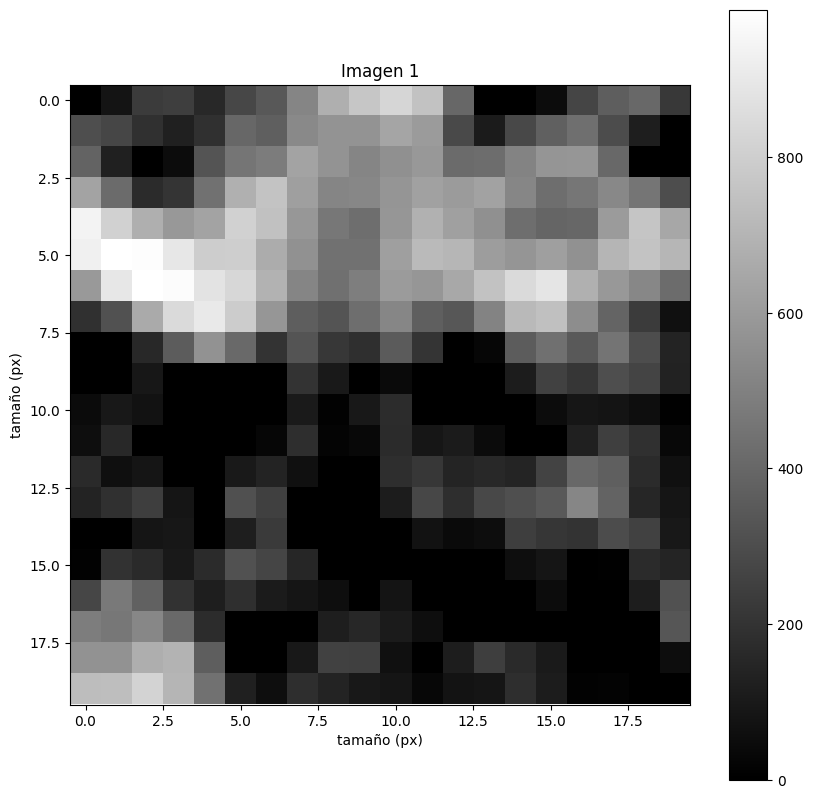

In [21]:
ROI_noise_m1 = img_1[y1:y2, x1:x2]
print('Media del ruido: ', np.mean(ROI_noise_m1))
print(np.max(img_1))
plt.figure(figsize=(10,10))
plt.imshow(ROI_noise_m1, cmap=plt.cm.gray)  
plt.xlabel('tamaño (px)')
plt.ylabel('tamaño (px)')
plt.title('Imagen 1')
plt.colorbar() 
plt.show()

### Test de lilliefors (Kolmogorov - Smirnov)

In [22]:
from statsmodels.stats.diagnostic import lilliefors
stat, pval = lilliefors(ROI_noise_m1.flatten())

if pval < 0.05: 
    print("Se rechaza la hipótesis nula, por tanto no existe evidencia estadística que permita afirmar que la distribución es normal.")
else:
    print("Se acepta la hipótesis nula, por tanto existe evidencia estadística que permite afirmar que la distribución es normal.")

Se rechaza la hipótesis nula, por tanto no existe evidencia estadística que permita afirmar que la distribución es normal.


### Test de 

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/siim-medical-images")

print("Path to dataset files:", path)

100%|██████████| 250M/250M [02:19<00:00, 1.87MB/s] 

Extracting files...


Path to dataset files: C:\Users\crist\.cache\kagglehub\datasets\kmader\siim-medical-images\versions\6
